In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('rte_data.csv')

In [5]:
data.head()

,Lookupkey,tax_year,academic_year,YAG,sex,subject_name,inst_type,provider_name,ukprn,provider_LA,...,earnings_median,earnings_UQ,POLAR_num_included,POLAR_percent,PA_num_included,PA_median,PA_rank,PA_band,POLAR_include_percent,PA_include_percent
0,"YAG5Female + maleAgriculture, food and related...",2018/2019,2012/2013,5,Female + male,"Agriculture, food and related studies",FEC,Askham Bryan College,10000415,York,...,17900,23400,30,19.4,5,200,0.717741935,2,46.3,10.4
1,"YAG5Female + maleAgriculture, food and related...",2018/2019,2012/2013,5,Female + male,"Agriculture, food and related studies",FEC,Bishop Burton College,10000721,East Riding of Yorkshire,...,18400,26600,25,3.7,20,180,0.846774194,3,75,52.8
2,"YAG5Female + maleAgriculture, food and related...",2018/2019,2012/2013,5,Female + male,"Agriculture, food and related studies",FEC,BMC (Brooksby Melton College),10000952,Melton,...,c,c,c,c,c,c,c,c,c,c
3,"YAG5Female + maleAgriculture, food and related...",2018/2019,2012/2013,5,Female + male,"Agriculture, food and related studies",FEC,Cornwall College,10001696,Cornwall,...,c,c,c,c,c,c,c,c,c,c
4,"YAG5Female + maleAgriculture, food and related...",2018/2019,2012/2013,5,Female + male,"Agriculture, food and related studies",FEC,Guildford College of Further and Higher Education,10002815,Guildford,...,c,c,c,c,c,c,c,c,c,c


In [18]:
columns = ['tax_year','academic_year','YAG','sex','subject_name','provider_name','earnings_median','earnings_LQ','earnings_UQ']

In [34]:
cleaned = data[columns]
cleaned['earnings_median']

0        17900
1        18400
2            c
3            c
4            c
         ...  
40014    22300
40015    17900
40016    18200
40017    19000
40018    17900
Name: earnings_median, Length: 40019, dtype: object

In [39]:
cleaned['earnings_median'] = pd.to_numeric(cleaned['earnings_median'], errors='coerce')
cleaned = cleaned[cleaned['earnings_median'].notna()].astype({'earnings_median': int})

/var/folders/0d/vbxy9ygj5_11sqlxy8x1dd0r0000gr/T/ipykernel_15148/1350944324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['earnings_median'] = pd.to_numeric(cleaned['earnings_median'], errors='coerce')


In [40]:
cleaned['earnings_UQ'] = pd.to_numeric(cleaned['earnings_UQ'], errors='coerce')
cleaned = cleaned[cleaned['earnings_UQ'].notna()].astype({'earnings_UQ': int})

In [41]:
cleaned['earnings_LQ'] = pd.to_numeric(cleaned['earnings_LQ'], errors='coerce')
cleaned = cleaned[cleaned['earnings_LQ'].notna()].astype({'earnings_LQ': int})

In [42]:
cleaned.head()

,tax_year,academic_year,YAG,sex,subject_name,provider_name,earnings_median,earnings_LQ,earnings_UQ
0,2018/2019,2012/2013,5,Female + male,"Agriculture, food and related studies",Askham Bryan College,17900,15000,23400
1,2018/2019,2012/2013,5,Female + male,"Agriculture, food and related studies",Bishop Burton College,18400,11700,26600
5,2018/2019,2012/2013,5,Female + male,"Agriculture, food and related studies",Hadlow College,18800,16100,24800
7,2018/2019,2012/2013,5,Female + male,"Agriculture, food and related studies",Moulton College,22400,13800,32700
8,2018/2019,2012/2013,5,Female + male,"Agriculture, food and related studies",Reaseheath College,17200,12700,21500


In [43]:
cleaned.to_csv('cleaned.csv')

In [44]:
cleaned = cleaned[cleaned['subject_name']=='Economics']
cleaned

,tax_year,academic_year,YAG,sex,subject_name,provider_name,earnings_median,earnings_LQ,earnings_UQ
947,2018/2019,2012/2013,5,Female + male,Economics,Anglia Ruskin University,31400,20800,47100
951,2018/2019,2012/2013,5,Female + male,Economics,Birmingham City University,29000,21900,39400
952,2018/2019,2012/2013,5,Female + male,Economics,Brunel University London,33900,25600,46000
954,2018/2019,2012/2013,5,Female + male,Economics,Cardiff University,45300,34700,59500
955,2018/2019,2012/2013,5,Female + male,Economics,Coventry University,31600,24800,40600
...,...,...,...,...,...,...,...,...,...
26641,2018/2019,2016/2017,1,Male,Economics,University of Hertfordshire,19300,9300,28800
26642,2018/2019,2016/2017,1,Male,Economics,University of Newcastle-upon-Tyne,28500,20800,31000
26643,2018/2019,2016/2017,1,Male,Economics,University of Nottingham,29600,23000,34300
26644,2018/2019,2016/2017,1,Male,Economics,University of Plymouth,25200,20800,30300


In [45]:
cleaned = cleaned[cleaned['provider_name']=='The University of Bath']
cleaned

,tax_year,academic_year,YAG,sex,subject_name,provider_name,earnings_median,earnings_LQ,earnings_UQ
980,2018/2019,2012/2013,5,Female + male,Economics,The University of Bath,59100,44500,81000
4173,2018/2019,2014/2015,3,Female + male,Economics,The University of Bath,49600,33600,79900
7476,2018/2019,2016/2017,1,Female + male,Economics,The University of Bath,32500,26300,39400
10763,2018/2019,2012/2013,5,Female,Economics,The University of Bath,56900,42300,63500
13853,2018/2019,2012/2013,5,Male,Economics,The University of Bath,62800,45300,84000
16957,2018/2019,2014/2015,3,Female,Economics,The University of Bath,47300,37200,79900
20123,2018/2019,2014/2015,3,Male,Economics,The University of Bath,50400,33200,83200
23299,2018/2019,2016/2017,1,Female,Economics,The University of Bath,29200,25200,33200
26596,2018/2019,2016/2017,1,Male,Economics,The University of Bath,33600,26300,40200


In [46]:
cleaned = cleaned[cleaned['sex']=='Male']
cleaned

,tax_year,academic_year,YAG,sex,subject_name,provider_name,earnings_median,earnings_LQ,earnings_UQ
13853,2018/2019,2012/2013,5,Male,Economics,The University of Bath,62800,45300,84000
20123,2018/2019,2014/2015,3,Male,Economics,The University of Bath,50400,33200,83200
26596,2018/2019,2016/2017,1,Male,Economics,The University of Bath,33600,26300,40200


<AxesSubplot:xlabel='YAG'>

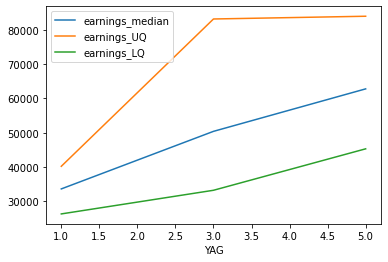

In [47]:
cleaned.plot(x='YAG',y=['earnings_median','earnings_UQ','earnings_LQ'])

In [ ]:
import 